## CFChemDb demo - cheminformatics db and development system
Jeremy Yang

Common Fund Data Ecosystem (CFDE)

* https://github.com/nih-cfde
* https://github.com/druggablegenome/idg-cfde
* https://github.com/jeremyjyang/rdkit-tools

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import rdktools
import rdktools.db
import rdktools.util

In [2]:
dbcon = rdktools.util.db.Connect("localhost", 5432, "cfchemdb", "www", "foobar")

In [3]:
rdktools.util.db.ListTablesRowCounts(dbcon)

,schema,table,rowcount
0,public,glygen,33531
0,public,refmet,154676
0,public,idg,251677
0,public,mols,308206
0,public,reprotox,965
0,public,lincs,32469


In [4]:
rdktools.util.db.ListColumns(dbcon)

,schema,table,column_name,data_type
0,public,glygen,glycan_type,character varying
1,public,glygen,mass_pme,double precision
2,public,glygen,number_monosaccharides,integer
3,public,glygen,fully_determined,character varying
4,public,glygen,wurcs,character varying
...,...,...,...,...
5,public,lincs,inchi_key,character varying
6,public,lincs,compound_aliases,character varying
7,public,lincs,sig_count,integer
8,public,lincs,cansmi,character varying


### Example data from each dataset

* __IDG__

In [5]:
idg_sample = pd.read_sql("SELECT * FROM idg WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
idg_sample

,pubchem_cid,smiles,target_count,activity_count,cansmi,mol_id
0,122184701,OC1CCN(Cc2ccc(OCCCc3ccc(nn3)c4ccc(Cl)cc4)cc2)CC1,1,1,OC1CCN(Cc2ccc(OCCCc3ccc(-c4ccc(Cl)cc4)nn3)cc2)CC1,164403
1,44414542,CN(C)C1CCN(C1)c2ccc(cn2)C3=COc4cc(Oc5ccc6OCCc6...,1,1,CN(C)C1CCN(c2ccc(-c3coc4cc(Oc5ccc6c(c5)CCO6)cc...,218777
2,136020074,NC1=Nc2c(ncn2[C@H]3CCN(C3)C(=O)P(=O)(O)O)C(=O)N1,1,14,Nc1nc2c(ncn2[C@H]2CCN(C(=O)P(=O)(O)O)C2)c(=O)[...,296404
3,135507495,Cn1ncc(Br)c1c2cc(NC(=O)Nc3ccc(Cl)cc3)ccc2O,2,3,Cn1ncc(Br)c1-c1cc(NC(=O)Nc2ccc(Cl)cc2)ccc1O,295458
4,11524437,COc1ccccc1c2cn3c(c(CN)c(C)nc3n2)c4ccc(Cl)c(Cl)c4,1,1,COc1ccccc1-c1cn2c(-c3ccc(Cl)c(Cl)c3)c(CN)c(C)n...,68185
5,135522391,CCCN1C(=O)N(CCC)c2[nH]c(nc2C1=O)c3cc(OCC(=O)N4...,1,1,CCCn1c(=O)c2nc(-c3cc(OCC(=O)N4CCN(c5ccc(F)cc5)...,295543


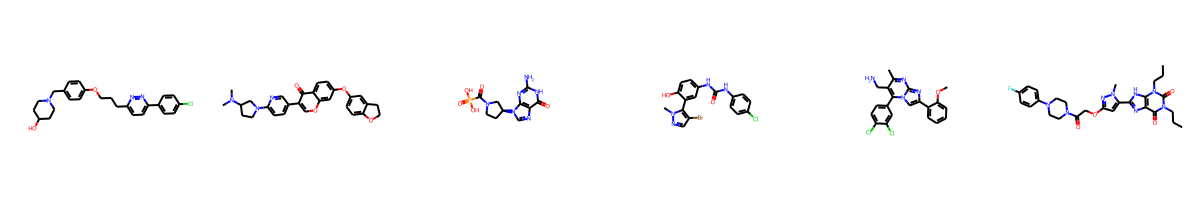

In [6]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in idg_sample.cansmi], molsPerRow=6)

* __LINCS__

In [7]:
lincs_sample = pd.read_sql("SELECT * FROM lincs WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
lincs_sample

,id,pert_name,target,moa,smiles,inchi_key,compound_aliases,sig_count,cansmi,mol_id
0,BRD-K96093221,BRD-K96093221,None,None,CO[C@@H]1CC[C@H]2CCN(C)C(=O)C[C@H](CN(C)C(=O)c...,PPQNLGLVWDESKN-PZXVYJQKSA-N,None,2,CO[C@@H]1CC[C@H]2CCN(C)C(=O)C[C@@H](c3ccccc3)C...,32814
1,BRD-K43057855,BRD-K43057855,None,None,COCC(=O)N1C[C@@H](C)[C@@H](CN(C)C(=O)c2cc(NC(=...,QUVWWXZLNVGVGD-XCGNWRKASA-N,None,3,COCC(=O)N1C[C@@H](C)[C@H](OC)CN(C)C(=O)c2cc(NC...,28126
2,BRD-K39318886,BRD-K39318886,None,None,FC(F)Oc1ccc(cc1OCC2CC2)C3=Nn4c(nnc4SC3)c5ccccc5Cl,LFZGKSILZCJTOF-UHFFFAOYSA-N,None,18,FC(F)Oc1ccc(C2=Nn3c(nnc3-c3ccccc3Cl)SC2)cc1OCC...,44979
3,BRD-K70917163,BRD-K70917163,None,None,COc1ccc(CCn2c(N)cc(=O)[nH]c2=S)cc1OC,BKQGOJCZGYSRSN-UHFFFAOYSA-N,None,17,COc1ccc(CCn2c(N)cc(=O)[nH]c2=S)cc1OC,45488
4,BRD-K55508908,BRD-K55508908,None,None,CO[C@@H]1CN(C)C(=O)c2cc(NS(C)(=O)=O)ccc2OC[C@H...,None,None,1,CO[C@@H]1CN(C)C(=O)c2cc(NS(C)(=O)=O)ccc2OC[C@H...,37863
5,BRD-K20897375,BRD-K20897375,None,None,COc1ccc(cc1)S(=O)(=O)N(C)C[C@H]1Oc2ccc(cc2CC(=...,None,None,3,COc1ccc(S(=O)(=O)N(C)C[C@H]2Oc3ccc(N(C)C)cc3CC...,40842


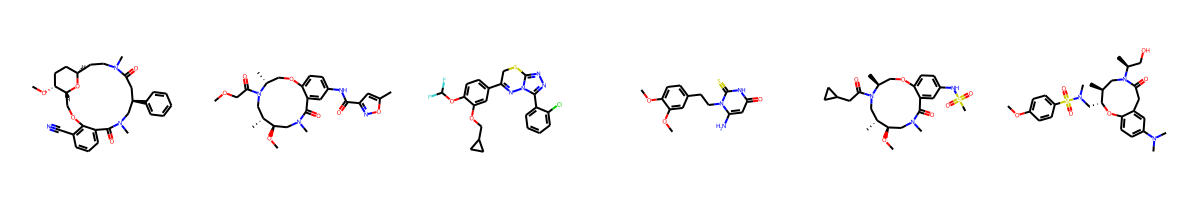

In [8]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in lincs_sample.cansmi], molsPerRow=6)

* __RefMet__

In [9]:
refmet_sample = pd.read_sql("SELECT * FROM refmet WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
refmet_sample

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid,cansmi,mol_id
0,Arg-Ser-Trp,Organic acids,Amino acids and peptides,Tripeptides,C20H29N7O5,447.22301799999997,FBXMCPLCVYUWBO-BPUTZDHNSA-N,NC(=N)NCCC[C@@H](N)C(=O)N[C@H](CO)C(=O)N[C@H](...,145453943,N=C(N)NCCC[C@@H](N)C(=O)N[C@H](CO)C(=O)N[C@H](...,10878
1,PI O-20:0/21:0,Glycerophospholipids,Glycerophosphoinositols,O-PI,C50H99O12P,922.687418,DAJWPQITDOHFGF-ULZUSFMRSA-N,CCCCCCCCCCCCCCCCCCCCOC[C@@H](COP(O)(=O)O[C@H]1...,52928480,CCCCCCCCCCCCCCCCCCCCOC[C@@H](COP(=O)(O)O[C@@H]...,8225
2,Ala-His-Gln,Organic acids,Amino acids and peptides,Tripeptides,C14H22N6O5,354.165169,LTSBJNNXPBBNDT-HGNGGELXSA-N,C[C@@H](N)C(=O)N[C@H](Cc1c[nH]c[n]1)C(=O)N[C@H...,145453591,C[C@@H](N)C(=O)N[C@H](Cc1c[nH]cn1)C(=O)N[C@H](...,10293
3,EPC 14:0;O2/32:0,Sphingolipids,Phosphosphingolipids,EPC,C48H99N2O6P,830.724076,ALQQXDADTCQNCN-KBRGEABDSA-N,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CO...,145718335,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CO...,1560
4,LacCer 18:1;O2/18:0,Sphingolipids,Glycosphingolipids,Hex2Cer,C48H91NO13,889.649044,VOZHMDQUIRUFQW-WOVAPMOWSA-N,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1OC(C...,44260141,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1OC(C...,22795
5,Cholest-5-ene,Sterol Lipids,Sterols,Cholesterols,C27H46,370.35995,DTGDZMYNKLTSKC-HKQCOZBKSA-N,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4CCC...,440663,CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4CCC...,3745


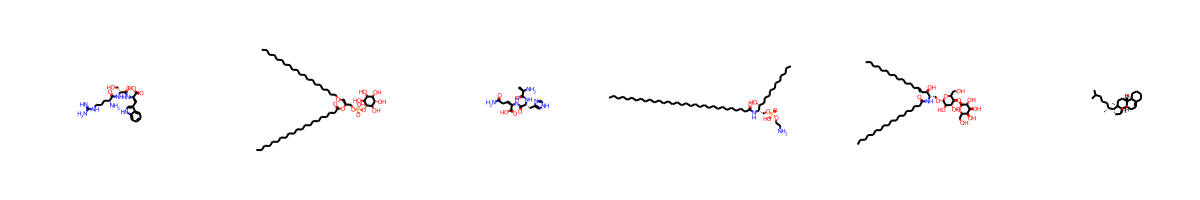

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in refmet_sample.cansmi], molsPerRow=6)

* __GlyGen__

In [11]:
glygen_sample = pd.read_sql("SELECT * FROM glygen WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
glygen_sample

,glycan_type,mass_pme,number_monosaccharides,fully_determined,wurcs,byonic,glytoucan_ac,missing_score,glycam,inchi,...,smiles,mass,glygen_id,inchi_key,glytoucan_id,pubchem_cid,pubchem_sid,chebi_id,cansmi,mol_id
0,Saccharide,1730.88,8,nan,"WURCS=2.0/5,8,7/[a2122h-1x_1-5_2*NCC/3=O][a212...",Hex(5)HexNAc(2)dHex(1) % 1380.49133628,G18410AS,87,nan,InChI=1S/C52H88N2O40/c1-11-23(61)31(69)35(73)4...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)OC[C@@H]2[...,1380.49,29281,XGYLSVMAAIMGCA-UKOLRAOJSA-N,G18410AS,71297623.0,252292476.0,147895.0,CC(=O)N[C@H]1C(O)O[C@H](CO[C@@H]2O[C@@H](C)[C@...,304795
1,Saccharide,2303.19,10,yes,"WURCS=2.0/5,10,9/[a2122h-1b_1-5_2*NCC/3=O][a11...",Hex(3)HexNAc(6)dHex(1) % 1868.7031797,G85542KD,0,DGalpNAcb1-4DGlcpNAcb1-2DManpa1-3[DGalpNAcb1-4...,InChI=1S/C72H120N6O50/c1-17-39(92)51(104)54(10...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)OC[C@@H]2[...,1868.70,29303,MLAPVPGCNXECPV-VRDKRUSASA-N,G85542KD,91849839.0,252281556.0,154352.0,CC(=O)N[C@H]1[C@H](O[C@@H]2[C@@H](OC[C@H]3O[C@...,302168
2,Saccharide,454.24,2,yes,"WURCS=2.0/1,2,1/[a2112h-1b_1-5]/1-1/a6-b1",Hex(2) % 342.1162117,G08539FO,0,DGalpb1-6DGalpb1-OH,InChI=1S/C12H22O11/c13-1-3-5(14)8(17)10(19)12(...,...,C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)OC[C@@H...,342.12,14474,DLRVVLDZNNYCBX-WSWWMNSNSA-N,G08539FO,11336802.0,252276323.0,61770.0,OC[C@H]1O[C@@H](OC[C@H]2O[C@@H](O)[C@H](O)[C@@...,306472
3,Saccharide,1923.97,9,yes,"WURCS=2.0/4,9,8/[a2122h-1b_1-5_2*NCC/3=O][a112...",Hex(8)HexNAc(1) % 1517.51252531,G16475AJ,0,DGlcpa1-3DManpa1-2DManpa1-2DManpa1-3[DManpa1-3...,InChI=1S/C56H95NO46/c1-11(65)57-21-30(74)42(18...,...,CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O)CO)O...,1517.51,29696,VEJRZQXYEZAHKN-YBDXDJPXSA-N,G16475AJ,91850871.0,252282793.0,148132.0,CC(=O)N[C@H]1[C@H](O)O[C@H](CO)[C@@H](O[C@@H]2...,305370
4,Saccharide,3218.62,13,yes,"WURCS=2.0/5,13,12/[a2122h-1b_1-5_2*NCC/3=O][a1...",Hex(6)HexNAc(5)NeuAc(2) % 2587.915202,G53812BX,0,DNeup5Aca2-3DGalpb1-4DGlcpNAcb1-2[DGalpb1-4DGl...,InChI=1S/C98H161N7O72/c1-23(118)99-45-30(125)8...,...,CC(=O)N[C@@H]1[C@H](C[C@@](O[C@H]1[C@@H]([C@@H...,2587.92,4698,GNIMEVSGZOKTGN-JEDYFYLLSA-N,G53812BX,91861537.0,252295559.0,151755.0,CC(=O)N[C@H]1[C@H](O[C@@H]2[C@@H](OC[C@H]3O[C@...,303803
5,Saccharide,710.38,3,yes,"WURCS=2.0/3,3,2/[a2122h-1b_1-5_2*NCC/3=O][a212...",HexNAc(2)dHex(1) % 570.22721878,G64665SI,0,DGlcpNAca1-4[LFucpb1-6]DGlcpNAcb1-OH,InChI=1S/C22H38N2O15/c1-6-13(28)17(32)18(33)22...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@H](O1)OC[C@@H]2[C...,570.23,16623,YBYSAIOYCWNLAP-IACHEIMTSA-N,G64665SI,91849407.0,252281067.0,152916.0,CC(=O)N[C@H]1[C@H](O)O[C@H](CO[C@H]2O[C@@H](C)...,303263


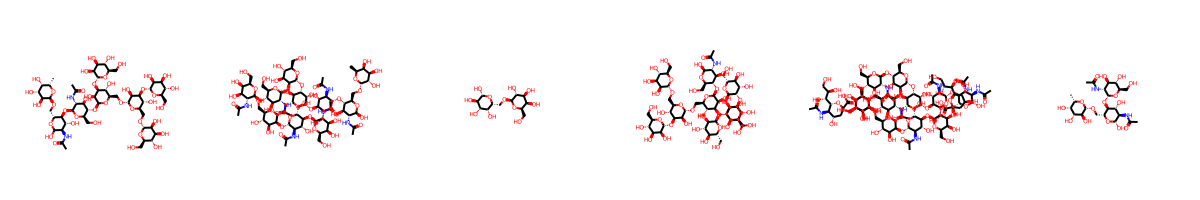

In [12]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in glygen_sample.cansmi], molsPerRow=6)

* __ReproTox__

In [13]:
reprotox_sample = pd.read_sql("SELECT * FROM reprotox WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
reprotox_sample

,ls_id,cas_rn,pubchem_cid,smiles,term,cansmi,mol_id
0,LS-103509,404-82-0,91452,Cl.CCNC(C)Cc1cccc(c1)C(F)(F)F,CNS,CCNC(C)Cc1cccc(C(F)(F)F)c1.Cl,298530
1,LS-1582,684-93-5,12699,CN(N=O)C(N)=O,CNS,CN(N=O)C(N)=O,298040
2,LS-150244,26861-87-0,92252,Cl.Nc1nncs1,CNS,Cl.Nc1nncs1,298340
3,LS-1788,80-05-7,6623,CC(C)(c1ccc(O)cc1)c1ccc(O)cc1,CNS,CC(C)(c1ccc(O)cc1)c1ccc(O)cc1,4320
4,LS-62442,78-04-6,9562062,[O-]C(=O)\C=C\C([O-])=O.CCCC[Sn++]CCCC,CNS,CCCC[Sn+2]CCCC.O=C([O-])/C=C/C(=O)[O-],298348
5,LS-55003,50-04-4,5745,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,CV,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,3608


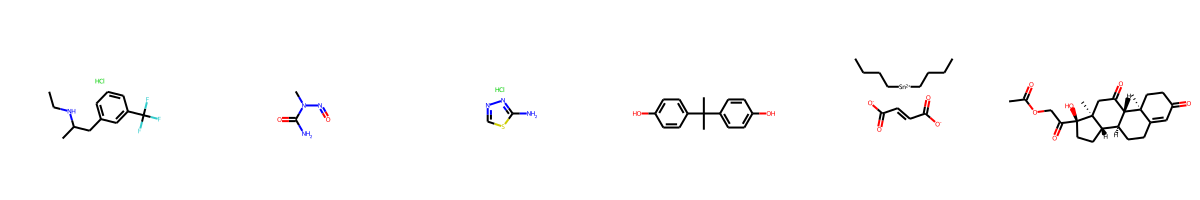

In [14]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in reprotox_sample.cansmi], molsPerRow=6)

### Chemical similarity search

In [15]:
hits = rdktools.db.MolSimilaritySearch("NCCc1cc(O)c(O)cc1", "mols", dbcon)
hits.head(12)

,cansmi,name,tanimoto
0,Cl.NCCc1ccc(O)c(O)c1,None,1.000000
1,NCCc1ccc(O)c(O)c1,None,1.000000
2,NCCc1cc(O)c(O)c(O)c1,None,0.921986
3,NCCc1cccc(O)c1,None,0.853846
4,CC(=O)NCCc1ccc(O)c(O)c1,None,0.817610
5,OCCc1ccc(O)c(O)c1,None,0.784722
6,NCCc1cc(O)c(O)cc1O,None,0.778443
7,Cl.NCCc1cc(O)c(O)cc1O,None,0.778443
8,O=CCc1ccc(O)c(O)c1,None,0.773973
9,COc1cc(CCN)ccc1O,None,0.773810


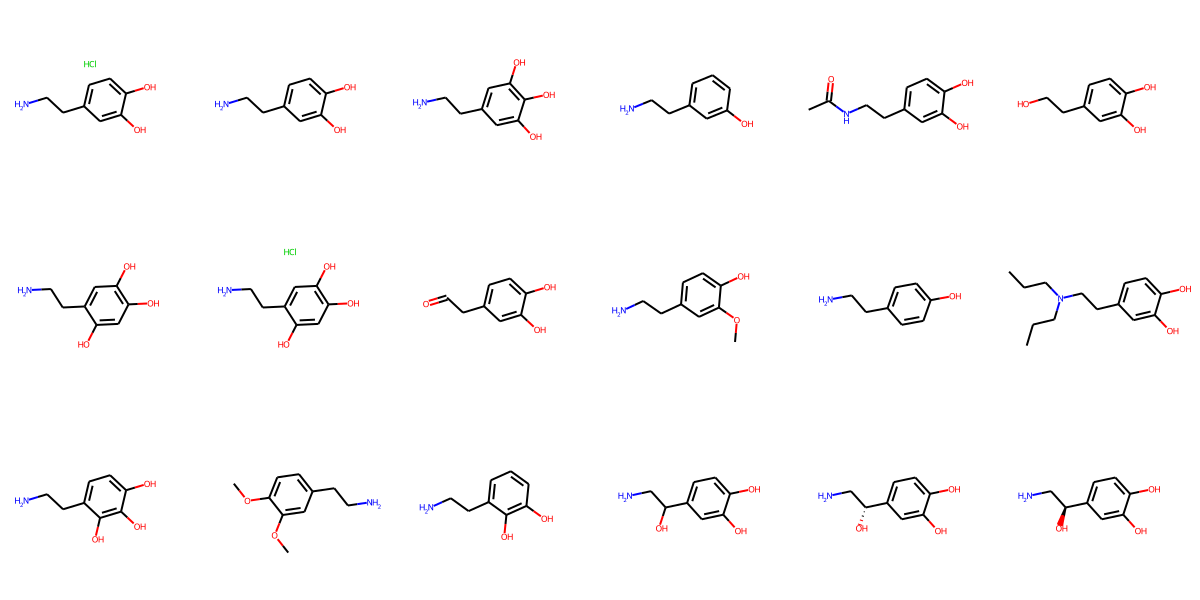

In [16]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in hits.cansmi[:18]], molsPerRow=6)

## Cansmi commonality

Comparing datasets by canonical SMILES.

In [20]:
cansmis={};
for table in ("idg", "lincs", "glygen", "refmet", "reprotox"):
  cansmis[table] = set(pd.read_sql(f"SELECT DISTINCT cansmi FROM {table} WHERE cansmi IS NOT NULL", dbcon)["cansmi"])
  print(f"{table:>12}: {len(cansmis[table]):6d} cansmis")

         idg: 249512 cansmis
       lincs:  26821 cansmis
      glygen:   9695 cansmis
      refmet:  23114 cansmis
    reprotox:    698 cansmis


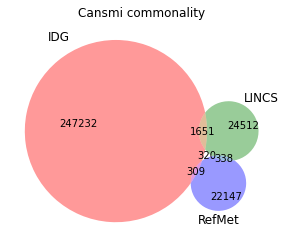

In [22]:
v3 = venn3([cansmis["idg"], cansmis["lincs"], cansmis["refmet"]], ('IDG', 'LINCS', 'RefMet'))
plt.title("Cansmi commonality")
plt.show()

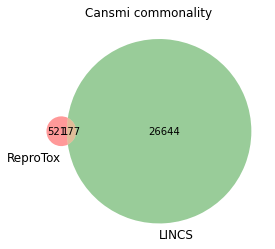

In [23]:
v2 = venn2([cansmis["reprotox"], cansmis["lincs"]], ('ReproTox', 'LINCS'))
plt.title("Cansmi commonality")
plt.show()